In [1]:
import os
import datetime

from pathlib import Path
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (14, 8)
mpl.rcParams['axes.grid'] = False

DATA_PATH = Path("__file__").absolute().parent.parent / 'artur 2' / 'data'

In [2]:
df_old = pd.read_csv(DATA_PATH / 'data_cleaned.csv')
df_old = df_old[['temperature', 'coluds_hight', 'snow', 'precipitation', 'pressure', 'date']]

df_old['date'] = pd.to_datetime(df_old['date'], 
                            format='%d/%m/%Y %H:%M')

df_old['month'] = pd.DatetimeIndex(df_old['date']).month
df_old.index = df_old['date']
df_old.drop(['date'], axis=1, inplace=True)

df_old

,temperature,coluds_hight,snow,precipitation,pressure,month
date,,,,,,
2013-07-10 17:00:00,13.6,8,0,0,771.7,7
2013-07-10 18:00:00,11.1,6,0,0,770.8,7
2013-07-10 19:00:00,12.9,8,0,0,771.5,7
2013-07-10 20:00:00,11.9,8,0,0,771.7,7
2013-07-10 21:00:00,10.0,1,0,0,771.3,7
...,...,...,...,...,...,...
2021-01-25 18:00:00,2.7,6,0,0,755.8,1
2021-01-25 19:00:00,2.0,6,0,0,756.1,1
2021-01-25 20:00:00,1.9,6,0,0,756.5,1


In [3]:
df_new = pd.read_csv(DATA_PATH / 'data_cleaned_lol.csv')
df_new = df_new[['temperature', 'coluds_hight', 'snow', 'precipitation', 'pressure', 'date']]

df_new['date'] = pd.to_datetime(df_new['date'], 
                            format='%d.%m.%Y %H:%M')

df_new['month'] = pd.DatetimeIndex(df_new['date']).month
df_new.index = df_new['date']
df_new.drop(['date'], axis=1, inplace=True)

df_new

,temperature,coluds_hight,snow,precipitation,pressure,month
date,,,,,,
2021-01-25 23:00:00,1.5,6,0,0,757.3,1
2021-01-26 00:00:00,1.8,8,0,0,757.6,1
2021-01-26 01:00:00,2.0,9,0,0,757.7,1
2021-01-26 02:00:00,1.1,10,0,0,758.2,1
2021-01-26 03:00:00,0.9,10,0,0,758.2,1
...,...,...,...,...,...,...
2021-04-29 19:00:00,5.8,6,0,0,761.7,4
2021-04-29 20:00:00,5.9,6,0,0,762.1,4
2021-04-29 21:00:00,4.7,6,0,0,762.6,4


In [4]:
df = pd.concat([df_old, df_new])
df

,temperature,coluds_hight,snow,precipitation,pressure,month
date,,,,,,
2013-07-10 17:00:00,13.6,8,0,0,771.7,7
2013-07-10 18:00:00,11.1,6,0,0,770.8,7
2013-07-10 19:00:00,12.9,8,0,0,771.5,7
2013-07-10 20:00:00,11.9,8,0,0,771.7,7
2013-07-10 21:00:00,10.0,1,0,0,771.3,7
...,...,...,...,...,...,...
2021-04-29 19:00:00,5.8,6,0,0,761.7,4
2021-04-29 20:00:00,5.9,6,0,0,762.1,4
2021-04-29 21:00:00,4.7,6,0,0,762.6,4


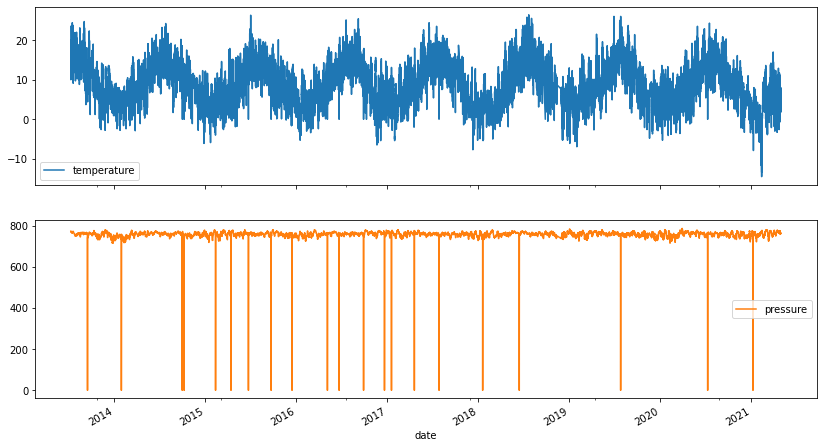

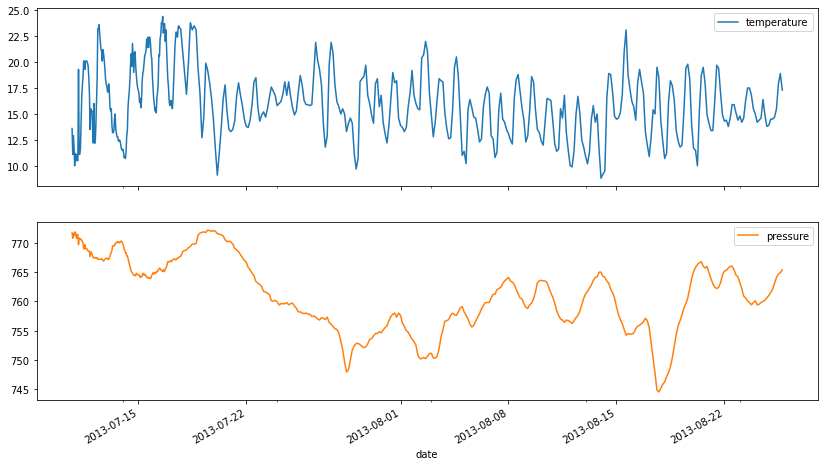

In [5]:
plot_cols = ['temperature', 'pressure', 'coluds_hight', 'snow', 'precipitation']
plot_features = df[plot_cols[:2]]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols[:2]][:480]
_ = plot_features.plot(subplots=True)


Text(0, 0.5, 'Temperature [Cels]')

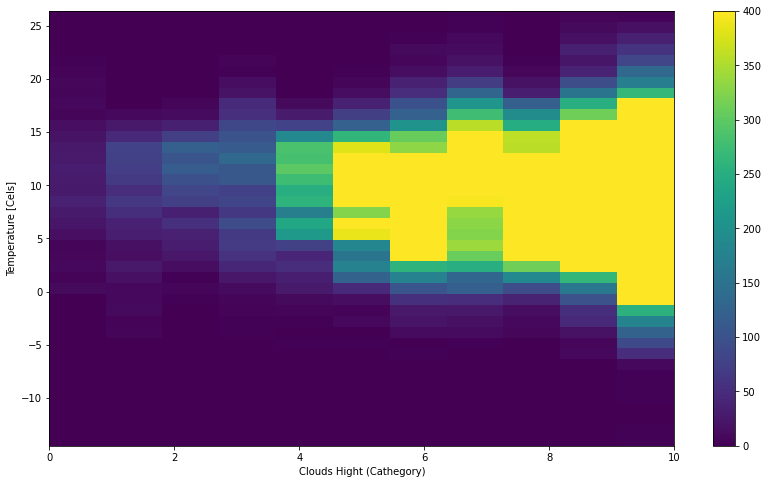

In [6]:
plt.hist2d(df['coluds_hight'], df['temperature'], bins=(11, 40), vmax=400)
plt.colorbar()
plt.xlabel('Clouds Hight (Cathegory)')
plt.ylabel('Temperature [Cels]')

In [7]:
date_time = df.index

timestamp_s = date_time.map(datetime.datetime.timestamp)

In [8]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

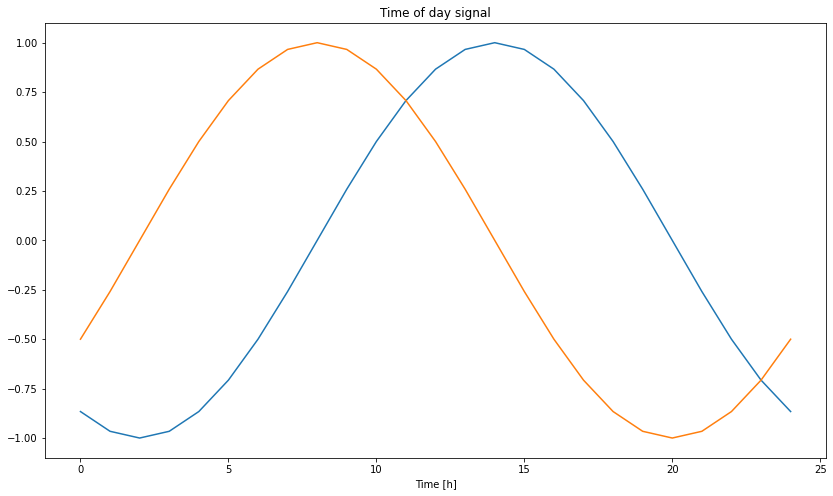

In [9]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

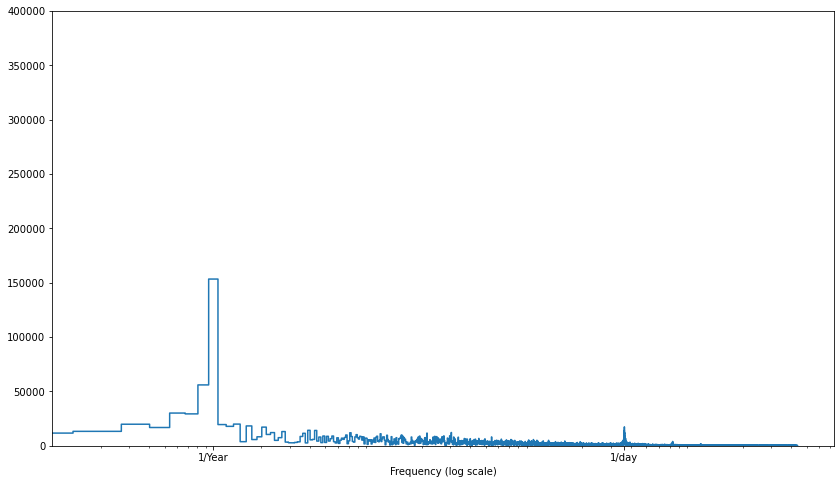

In [10]:
fft = tf.signal.rfft(df['temperature'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['temperature'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [11]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [12]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

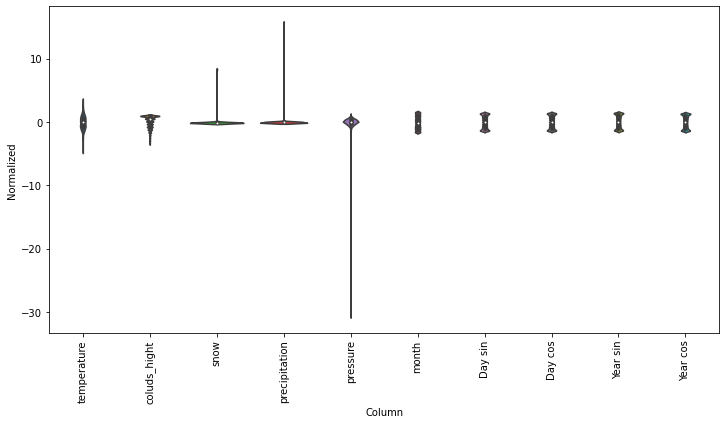

In [13]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [14]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [15]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['temperature'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['temperature']

In [16]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['temperature'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['temperature']

In [17]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [18]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 10)
Inputs shape: (3, 6, 10)
labels shape: (3, 1, 1)


In [19]:
w2.example = example_inputs, example_labels

In [20]:
def plot(self, model=None, plot_col='temperature', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

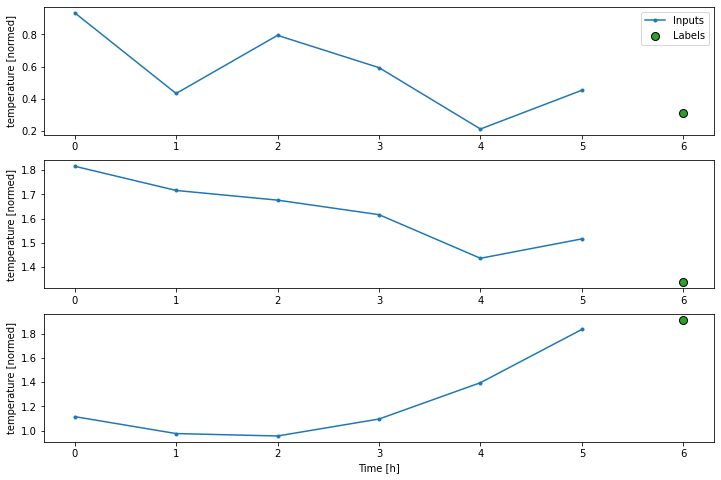

In [21]:
w2.plot()

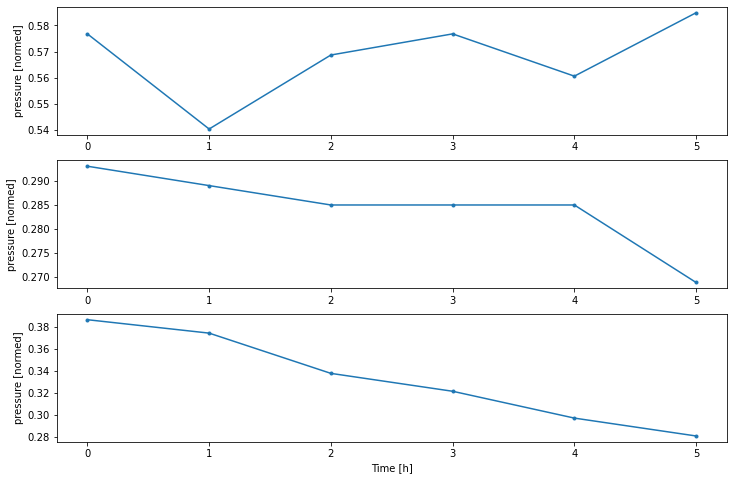

In [22]:
w2.plot(plot_col='pressure')

In [23]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [24]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [25]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [26]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 10)
Labels shape (batch, time, features): (32, 1, 1)


In [27]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['temperature'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['temperature']

In [28]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 10)
Labels shape (batch, time, features): (32, 1, 1)


In [29]:
# BASELINE MODEL

In [30]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [31]:
baseline = Baseline(label_index=column_indices['temperature'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

408/408 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_absolute_error: 0.1445


In [32]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['temperature'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['temperature']

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


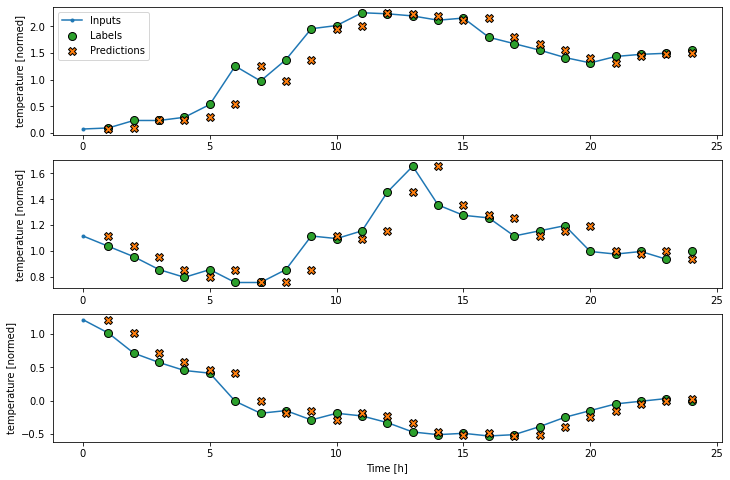

In [33]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

wide_window.plot(baseline)

In [34]:
# LINEAR MODEL

In [35]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [36]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 10)
Output shape: (32, 1, 1)


In [37]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [38]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1428/1428 [==============================] - 2s 1ms/step - loss: 0.4313 - mean_absolute_error: 0.4202 - val_loss: 0.0506 - val_mean_absolute_error: 0.1534
Epoch 2/20
1428/1428 [==============================] - 2s 2ms/step - loss: 0.0354 - mean_absolute_error: 0.1237 - val_loss: 0.0406 - val_mean_absolute_error: 0.1313
Epoch 3/20
1428/1428 [==============================] - 2s 1ms/step - loss: 0.0329 - mean_absolute_error: 0.1182 - val_loss: 0.0404 - val_mean_absolute_error: 0.1312
Epoch 4/20
1428/1428 [==============================] - 2s 1ms/step - loss: 0.0329 - mean_absolute_error: 0.1184 - val_loss: 0.0404 - val_mean_absolute_error: 0.1312
Epoch 5/20
408/408 [==============================] - 0s 1ms/step - loss: 0.0404 - mean_absolute_error: 0.1312


Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


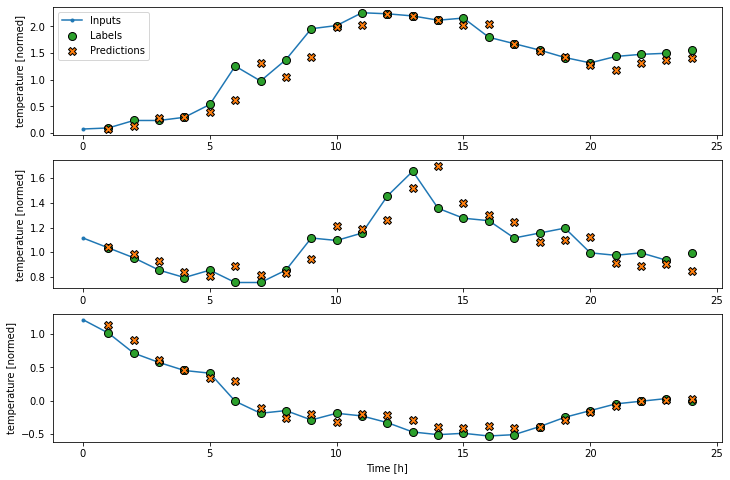

In [39]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

wide_window.plot(linear)

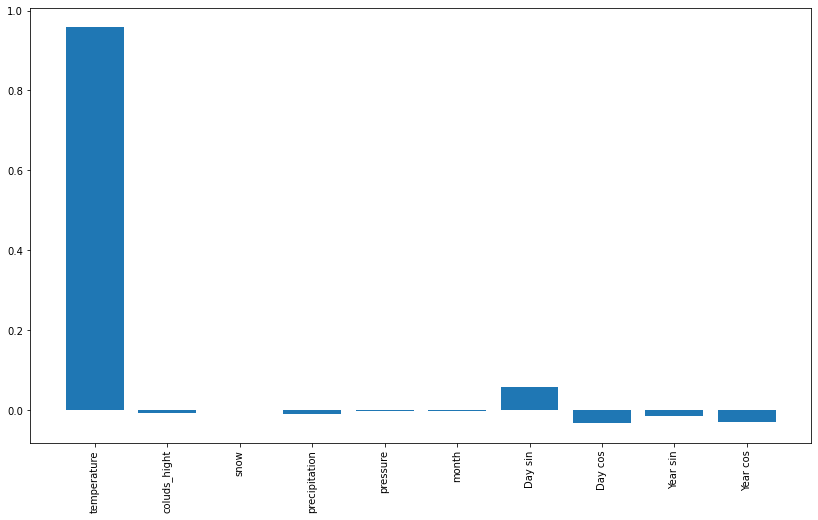

In [40]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [41]:
#DENSE MODEL

In [42]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1428/1428 [==============================] - 3s 2ms/step - loss: 0.0478 - mean_absolute_error: 0.1371 - val_loss: 0.0415 - val_mean_absolute_error: 0.1355
Epoch 2/20
1428/1428 [==============================] - 2s 2ms/step - loss: 0.0327 - mean_absolute_error: 0.1177 - val_loss: 0.0400 - val_mean_absolute_error: 0.1310
Epoch 3/20
1428/1428 [==============================] - 3s 2ms/step - loss: 0.0315 - mean_absolute_error: 0.1156 - val_loss: 0.0403 - val_mean_absolute_error: 0.1293
Epoch 4/20
1428/1428 [==============================] - 3s 2ms/step - loss: 0.0313 - mean_absolute_error: 0.1148 - val_loss: 0.0394 - val_mean_absolute_error: 0.1268
Epoch 5/20
1428/1428 [==============================] - 3s 2ms/step - loss: 0.0307 - mean_absolute_error: 0.1142 - val_loss: 0.0415 - val_mean_absolute_error: 0.1331
Epoch 6/20
1428/1428 [==============================] - 3s 2ms/step - loss: 0.0304 - mean_absolute_error: 0.1137 - val_loss: 0.0392 - val_mean_absolute_error: 0.1270
Epoc

In [43]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['temperature'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['temperature']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

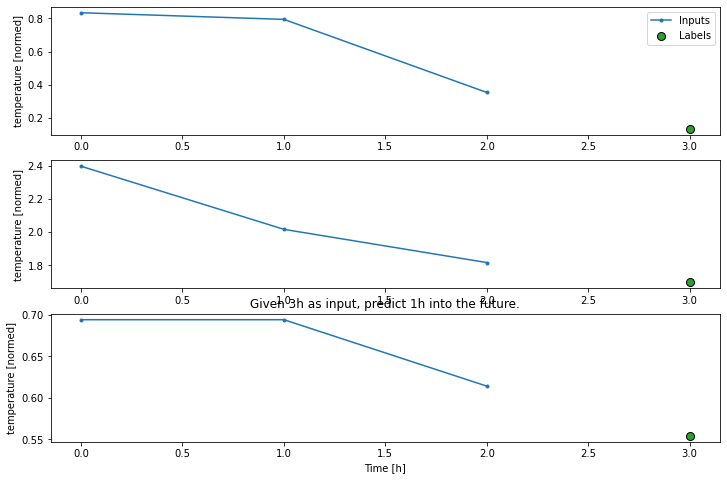

In [44]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [45]:
# You could train a dense model on a multiple-input-step window
# by adding a layers.Flatten as the first layer of the model:

In [46]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [47]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [48]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

408/408 [==============================] - 1s 1ms/step - loss: 0.0369 - mean_absolute_error: 0.1242


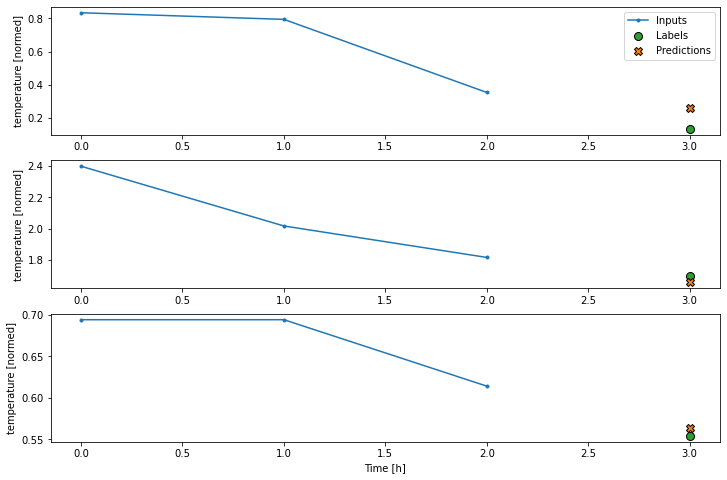

In [49]:
conv_window.plot(multi_step_dense)

In [50]:
# CNN

In [51]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [52]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [53]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

408/408 [==============================] - 1s 1ms/step - loss: 0.0376 - mean_absolute_error: 0.1280


In [54]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 10)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [55]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['temperature'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['temperature']

In [56]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 10)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


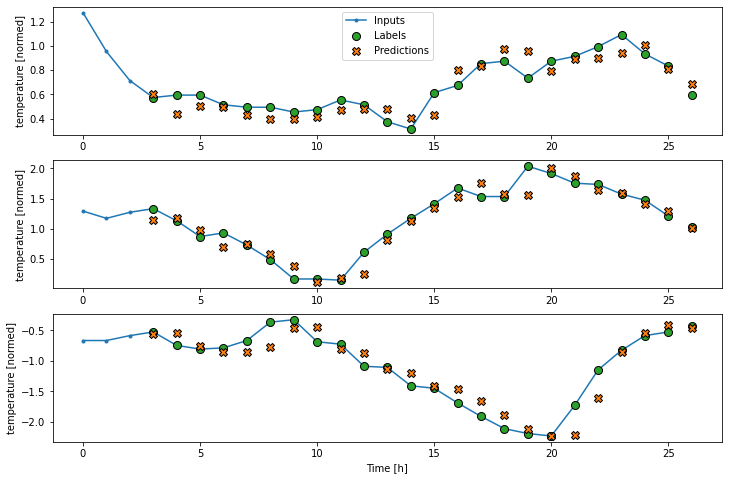

In [57]:
wide_conv_window.plot(conv_model)

In [58]:
# RNN

In [59]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [60]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


In [61]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

408/408 [==============================] - 1s 3ms/step - loss: 0.0368 - mean_absolute_error: 0.1218


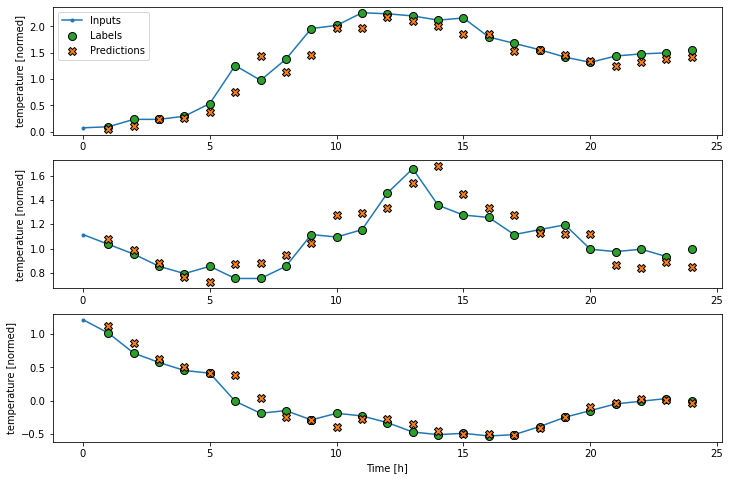

In [62]:
wide_window.plot(lstm_model)

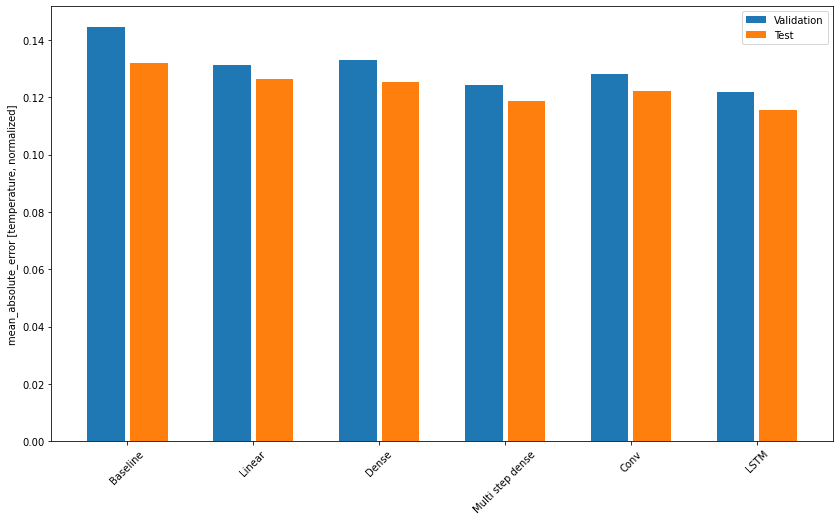

In [63]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [temperature, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [64]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.1320
Linear      : 0.1264
Dense       : 0.1253
Multi step dense: 0.1185
Conv        : 0.1223
LSTM        : 0.1154


In [65]:
# Multi-output models

In [66]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 10)
Labels shape (batch, time, features): (32, 24, 10)


In [67]:
# Multi-output models.Baseline

In [68]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [69]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

408/408 [==============================] - 1s 1ms/step - loss: 0.2658 - mean_absolute_error: 0.1224


In [70]:
# Multi-output models.Dence

In [71]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [72]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

408/408 [==============================] - 1s 2ms/step - loss: 0.1723 - mean_absolute_error: 0.1180


In [73]:
# Multi-output models.RNN

In [74]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

408/408 [==============================] - 1s 3ms/step - loss: 0.1697 - mean_absolute_error: 0.1126

Wall time: 1min 6s


In [75]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [76]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

408/408 [==============================] - 1s 3ms/step - loss: 0.1697 - mean_absolute_error: 0.1014

Wall time: 41.6 s


In [77]:
# Performance

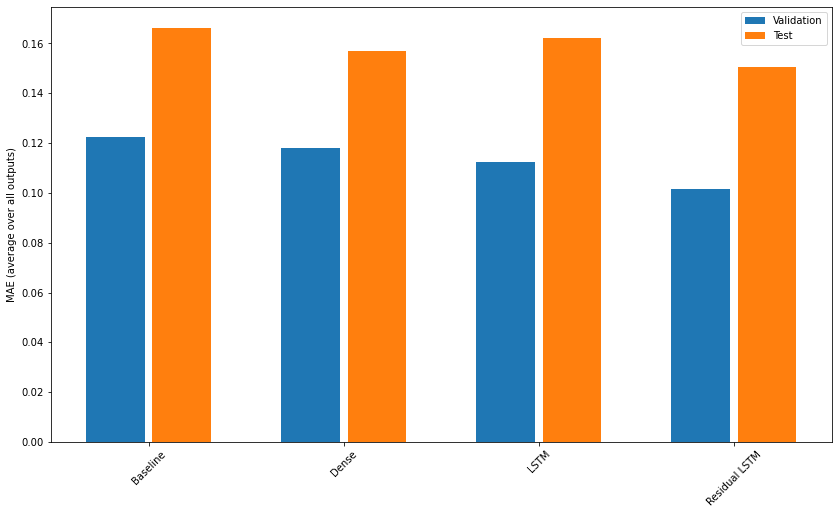

In [78]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [79]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1663
Dense          : 0.1568
LSTM           : 0.1621
Residual LSTM  : 0.1506


In [80]:
# Multi-step models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

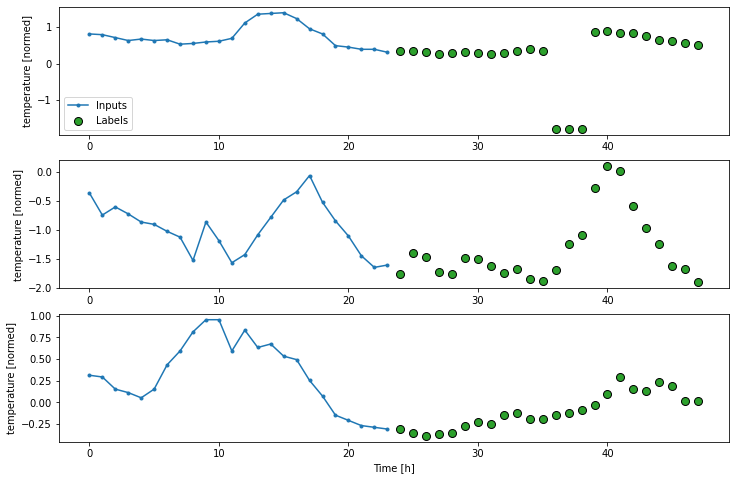

In [81]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [82]:
help(WindowGenerator)

Help on class WindowGenerator in module __main__:

class WindowGenerator(builtins.object)
 |  WindowGenerator(input_width, label_width, shift, train_df=                     temperature  coluds_hight      snow  precipitation  \
 |  date                                                                      
 |  2013-07-10 17:00:00     0.934689      0.087289 -0.120617       -0.06377   
 |  2013-07-10 18:00:00     0.433692     -0.779266 -0.120617       -0.06377   
 |  2013-07-10 19:00:00     0.794410      0.087289 -0.120617       -0.06377   
 |  2013-07-10 20:00:00     0.594011      0.087289 -0.120617       -0.06377   
 |  2013-07-10 21:00:00     0.213254     -2.945655 -0.120617       -0.06377   
 |  ...                          ...           ...       ...            ...   
 |  2019-01-23 17:00:00    -1.650456      0.953845 -0.120617       -0.06377   
 |  2019-01-23 18:00:00    -1.750655      0.953845 -0.120617       -0.06377   
 |  2019-01-23 19:00:00    -1.730616      0.953845 -0.120617  

In [83]:
multi_window.test

<MapDataset shapes: ((None, 24, 10), (None, 24, 10)), types: (tf.float32, tf.float32)>

In [84]:
# Baseline

407/407 [==============================] - 0s 1ms/step - loss: 0.8404 - mean_absolute_error: 0.3928


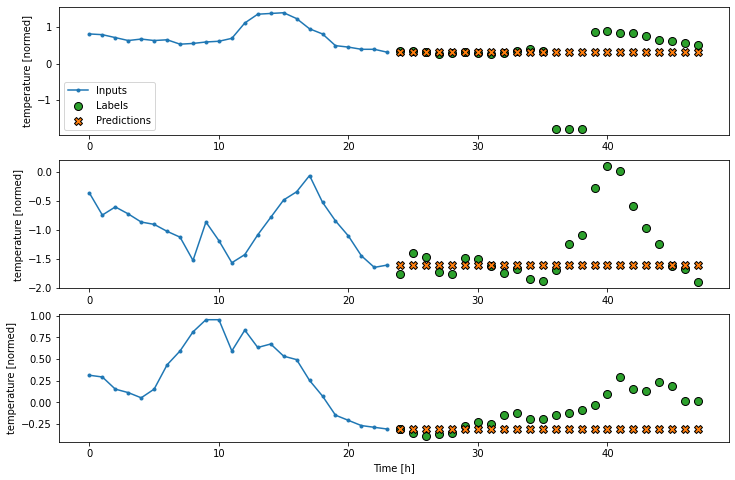

In [85]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

407/407 [==============================] - 0s 1ms/step - loss: 0.4621 - mean_absolute_error: 0.1787


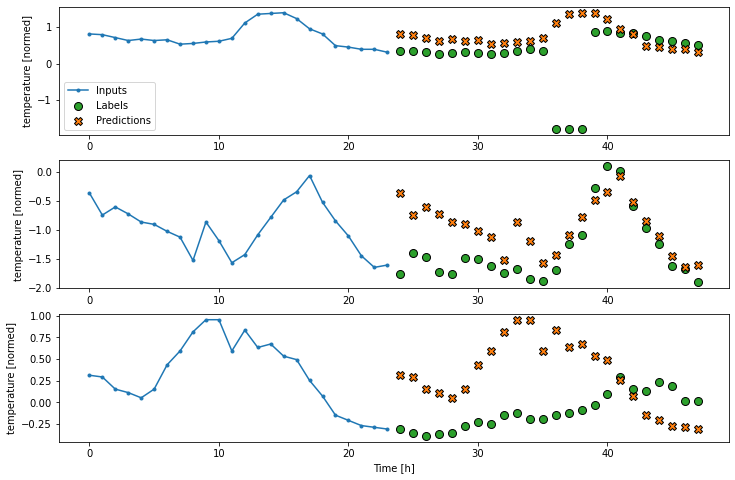

In [86]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

In [87]:
# Single-shot models

In [88]:
# LINEAR

407/407 [==============================] - 1s 1ms/step - loss: 0.2601 - mean_absolute_error: 0.1785


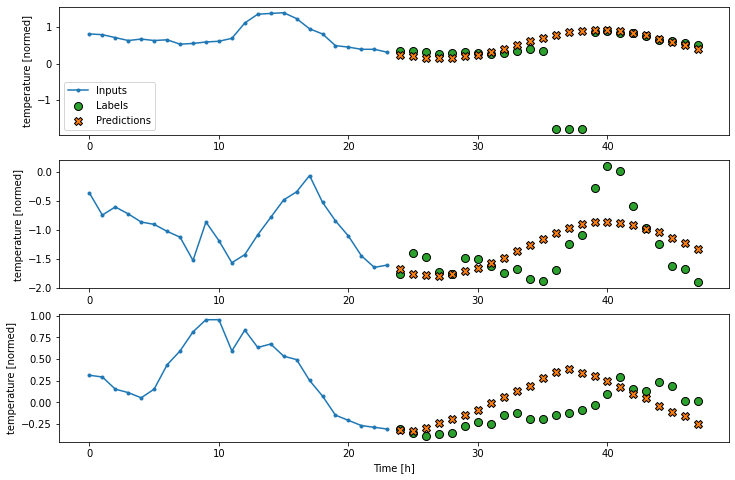

In [89]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [90]:
# DENSE

407/407 [==============================] - 1s 1ms/step - loss: 0.2459 - mean_absolute_error: 0.1672


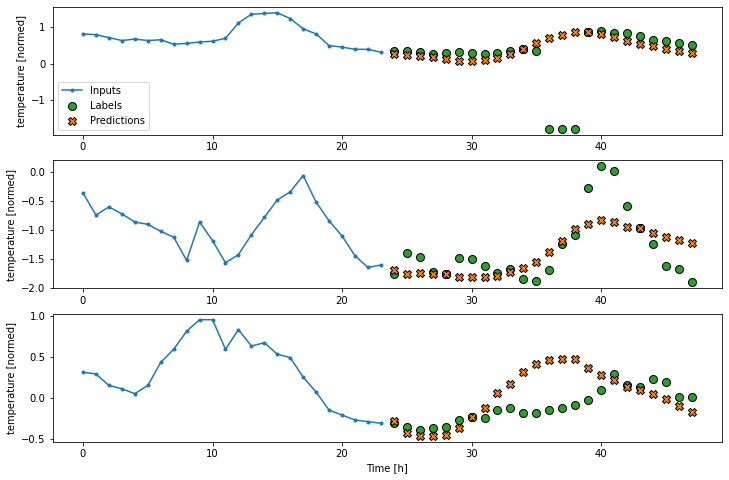

In [91]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

In [92]:
# CNN

407/407 [==============================] - 1s 2ms/step - loss: 0.2463 - mean_absolute_error: 0.1730


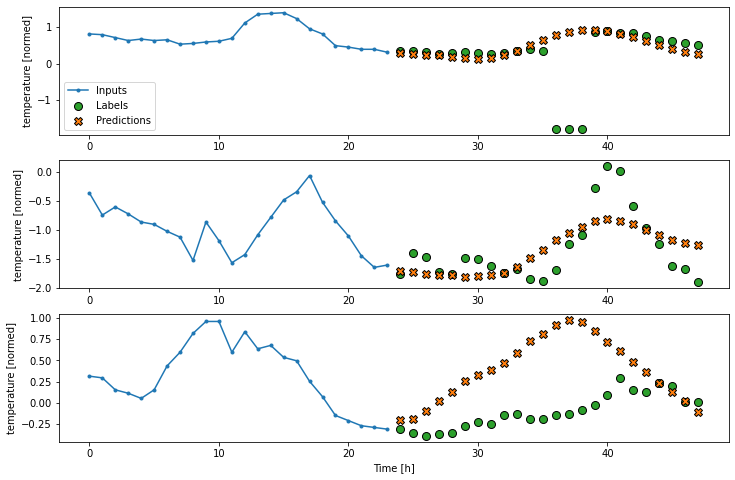

In [93]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

In [94]:
# RNN

407/407 [==============================] - 1s 3ms/step - loss: 0.2419 - mean_absolute_error: 0.1695


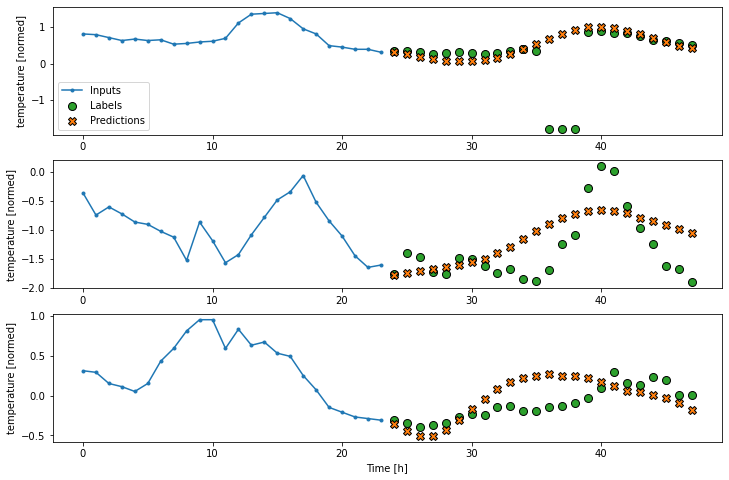

In [95]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [96]:
# Advanced: Autoregressive model

In [97]:
# RNN

In [98]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [99]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [100]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [101]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 10])

In [102]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [103]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 10)


407/407 [==============================] - 2s 4ms/step - loss: 0.2512 - mean_absolute_error: 0.1912


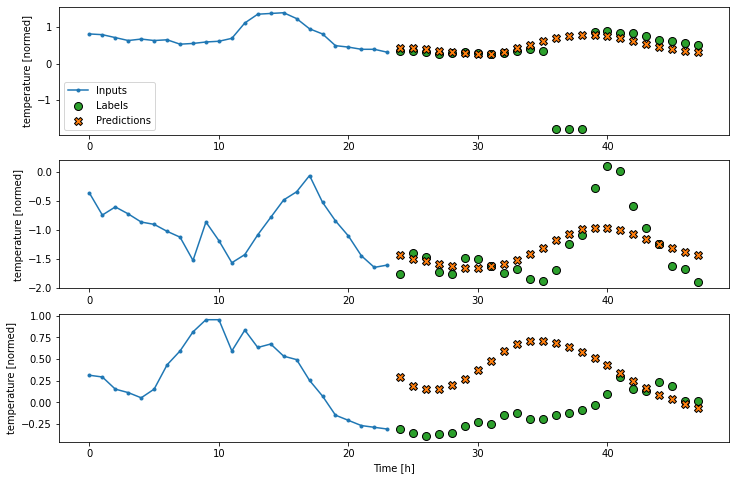

In [104]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [105]:
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)


In [106]:
feedback_model.predict(multi_window.test)[-1 , :][-1, :]

array([ 0.42448804, -0.8687175 ,  0.00698397,  0.09727463,  0.11724147,
        1.2476864 , -0.9164372 , -0.7921025 , -1.0911053 ,  0.85143846],
      dtype=float32)

In [107]:
multi_window.test_df

,temperature,coluds_hight,snow,precipitation,pressure,month,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,
2020-07-31 18:00:00,1.816444,0.953845,-0.120617,-0.06377,-0.091912,0.107909,-1.367417,-0.367731,-0.671328,-1.248579
2020-07-31 19:00:00,1.555926,0.953845,-0.120617,-0.06377,-0.091912,0.107909,-1.415570,-0.001442,-0.672220,-1.248084
2020-07-31 20:00:00,1.415647,-0.345988,-0.120617,-0.06377,-0.087860,0.107909,-1.367417,0.364847,-0.673112,-1.247589
2020-07-31 21:00:00,1.255328,0.953845,-0.120617,-0.06377,-0.104070,0.107909,-1.226241,0.706175,-0.674004,-1.247093
2020-07-31 22:00:00,1.275368,-0.345988,-0.120617,-0.06377,-0.104070,0.107909,-1.001662,0.999279,-0.674895,-1.246596
...,...,...,...,...,...,...,...,...,...,...
2021-04-29 19:00:00,-0.628422,-0.779266,-0.120617,-0.06377,0.171507,-0.747346,-1.415570,-0.001442,1.301349,-0.680800
2021-04-29 20:00:00,-0.608382,-0.779266,-0.120617,-0.06377,0.187718,-0.747346,-1.367417,0.364847,1.300872,-0.681689
2021-04-29 21:00:00,-0.848860,-0.779266,-0.120617,-0.06377,0.207981,-0.747346,-1.226241,0.706175,1.300395,-0.682576


In [108]:
results = feedback_model.predict(multi_window.test)

In [109]:
# results[-1 , :][-1, :]


inverse_transform(results[-1 , :][-1, :])

NameError: name 'inverse_transform' is not defined

In [110]:
multi_window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

In [111]:
help(feedback_model.predict)

Help on method predict in module tensorflow.python.keras.engine.training:

predict(x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False) method of __main__.FeedBack instance
    Generates output predictions for the input samples.
    
    Computation is done in batches. This method is designed for performance in
    large scale inputs. For small amount of inputs that fit in one batch,
    directly using `__call__` is recommended for faster execution, e.g.,
    `model(x)`, or `model(x, training=False)` if you have layers such as
    `tf.keras.layers.BatchNormalization` that behaves differently during
    inference. Also, note the fact that test loss is not affected by
    regularization layers like noise and dropout.
    
    Arguments:
        x: Input samples. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a

In [112]:
results

array([[[-0.39967898,  0.559882  , -0.07549499, ...,  1.1909668 ,
          1.1040229 ,  0.7338324 ],
        [-0.46398854,  0.5327466 , -0.09350555, ...,  1.3505342 ,
          1.1130869 ,  0.75395626],
        [-0.5303354 ,  0.48427474, -0.07563476, ...,  1.3908205 ,
          1.1157945 ,  0.7586951 ],
        ...,
        [-0.57659394,  0.35155982, -0.01351961, ...,  0.48946318,
          1.2480888 ,  0.7887446 ],
        [-0.66822416,  0.35730907, -0.01938489, ...,  0.8176376 ,
          1.2372968 ,  0.7794382 ],
        [-0.7349258 ,  0.37024188, -0.02034843, ...,  1.1006936 ,
          1.2275547 ,  0.76554   ]],

       [[-0.4796894 ,  0.06848924, -0.04320489, ...,  0.0458368 ,
         -0.36479956,  1.3004669 ],
        [-0.46515203,  0.1331952 , -0.10090642, ...,  0.3899809 ,
         -0.33337328,  1.331141  ],
        [-0.47394285,  0.18173708, -0.10513906, ...,  0.6846875 ,
         -0.31554762,  1.3426214 ],
        ...,
        [-0.6562269 ,  0.42782444,  0.06643967, ..., -

In [113]:
help(feedback_model)

Help on FeedBack in module __main__ object:

class FeedBack(tensorflow.python.keras.engine.training.Model)
 |  FeedBack(*args, **kwargs)
 |  
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  Arguments:
 |      inputs: The input(s) of the model: a `keras.Input` object or list of
 |          `keras.Input` objects.
 |      outputs: The output(s) of the model. See Functional API example below.
 |      name: String, the name of the model.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "Functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
 |  model = tf.keras.Model(inputs=inputs, outputs

In [114]:
multi_window.test_df

,temperature,coluds_hight,snow,precipitation,pressure,month,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,
2020-07-31 18:00:00,1.816444,0.953845,-0.120617,-0.06377,-0.091912,0.107909,-1.367417,-0.367731,-0.671328,-1.248579
2020-07-31 19:00:00,1.555926,0.953845,-0.120617,-0.06377,-0.091912,0.107909,-1.415570,-0.001442,-0.672220,-1.248084
2020-07-31 20:00:00,1.415647,-0.345988,-0.120617,-0.06377,-0.087860,0.107909,-1.367417,0.364847,-0.673112,-1.247589
2020-07-31 21:00:00,1.255328,0.953845,-0.120617,-0.06377,-0.104070,0.107909,-1.226241,0.706175,-0.674004,-1.247093
2020-07-31 22:00:00,1.275368,-0.345988,-0.120617,-0.06377,-0.104070,0.107909,-1.001662,0.999279,-0.674895,-1.246596
...,...,...,...,...,...,...,...,...,...,...
2021-04-29 19:00:00,-0.628422,-0.779266,-0.120617,-0.06377,0.171507,-0.747346,-1.415570,-0.001442,1.301349,-0.680800
2021-04-29 20:00:00,-0.608382,-0.779266,-0.120617,-0.06377,0.187718,-0.747346,-1.367417,0.364847,1.300872,-0.681689
2021-04-29 21:00:00,-0.848860,-0.779266,-0.120617,-0.06377,0.207981,-0.747346,-1.226241,0.706175,1.300395,-0.682576


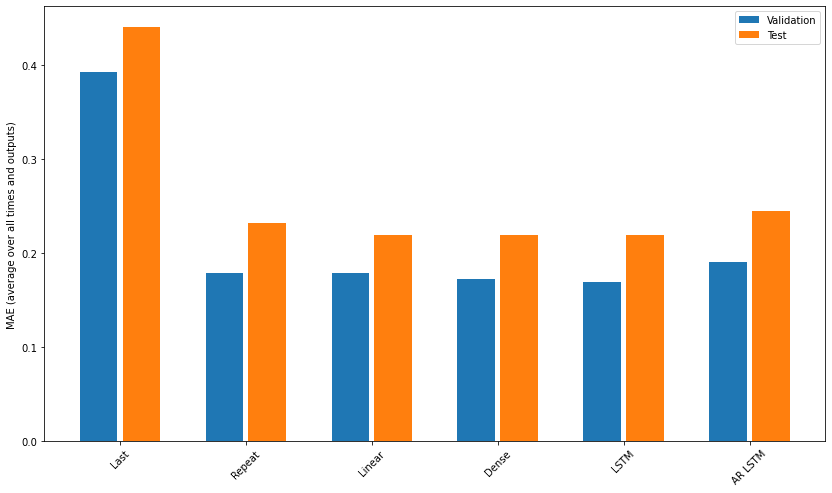

In [115]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [116]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.4408
Repeat  : 0.2326
Linear  : 0.2199
Dense   : 0.2198
LSTM    : 0.2196
AR LSTM : 0.2445
